Take a look at the [repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) for more information

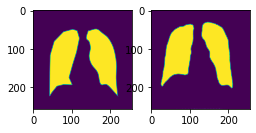

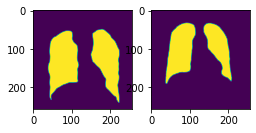

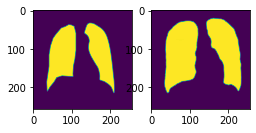

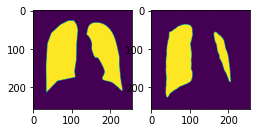

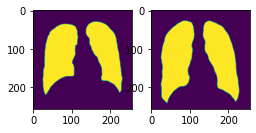

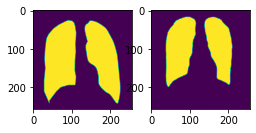

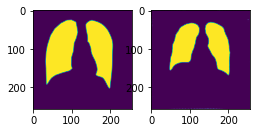

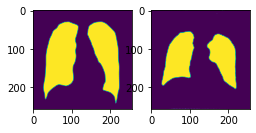

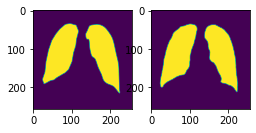

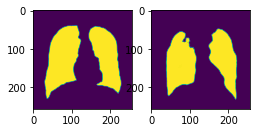

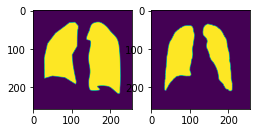

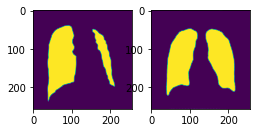

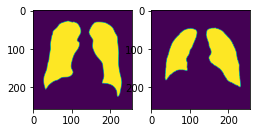

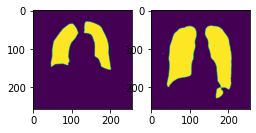

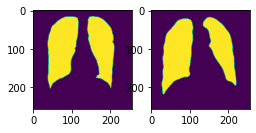

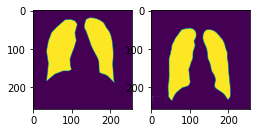

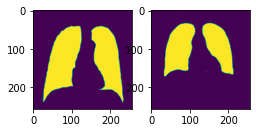

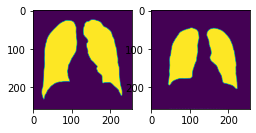

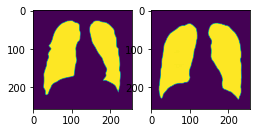

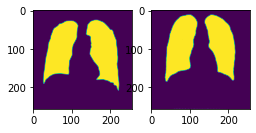

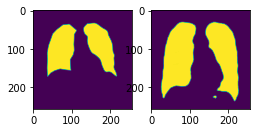

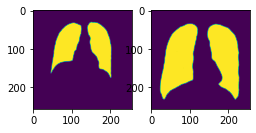

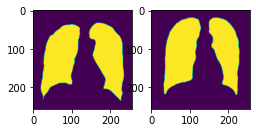

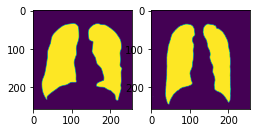

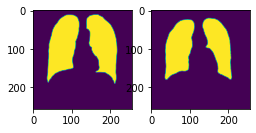

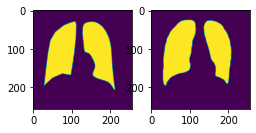

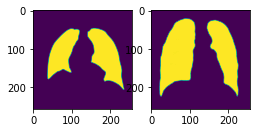

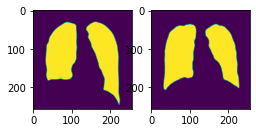

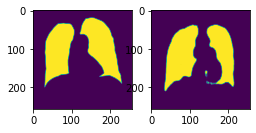

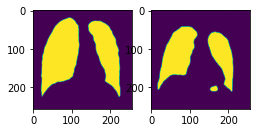

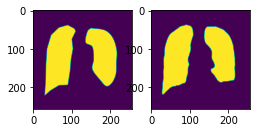

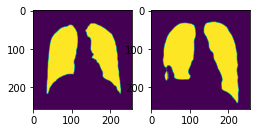

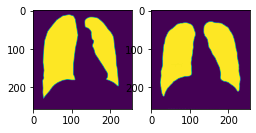

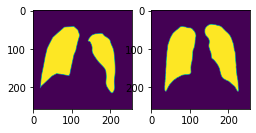

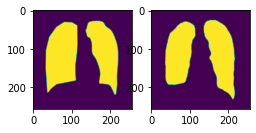

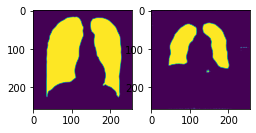

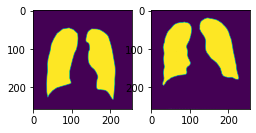

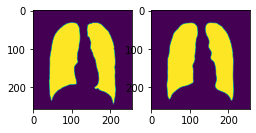

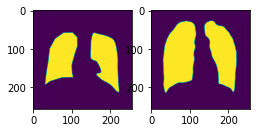

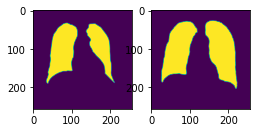

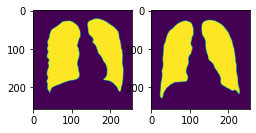

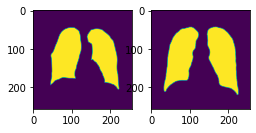

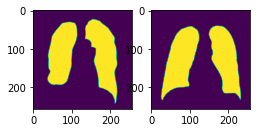

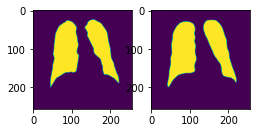

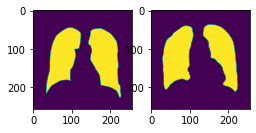

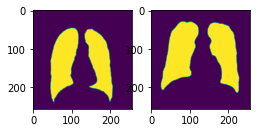

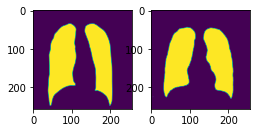

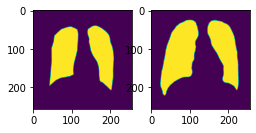

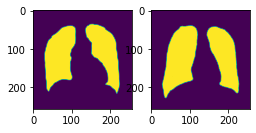

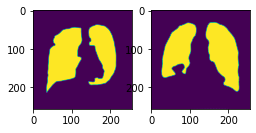

precision  --->  0.8339766438802084
recall  --->  0.8339766438802084
F1 score  --->  0.8339766438802084
iou  --->  0.7181736801677548
acc_list  --->  0.8339766438802084


In [33]:
import numpy as np
from skimage.metrics import adapted_rand_error
import skimage.color
import sklearn.metrics
import skimage.io
import os
import matplotlib.pyplot as plt


def compute_metrics(real_images, fake_images, dataset='binary'):
    metrics = dict()
    prec_list, rec_list, f1_list, iou_list, acc_list = [],[],[],[],[]
    for real, fake in zip(real_images, fake_images):
        if dataset == 'binary':
            truth = np.ceil(skimage.color.rgb2gray(skimage.io.imread(real))).astype('int')
            comp = np.ceil(skimage.color.rgb2gray(skimage.io.imread(fake))).astype('int')
        elif dataset == 'multiclass': 
            truth = skimage.io.imread(real)
            comp = skimage.io.imread(fake)
        plt.subplot(1,3,1)
        plt.imshow(truth[:,:,0])
        plt.subplot(1,3,2)
        plt.imshow(comp[:,:,0])
        plt.show()
        prec_list.append(sklearn.metrics.precision_score(truth.flatten(), comp.flatten(), pos_label=1, average='micro'))
        rec_list.append(sklearn.metrics.recall_score(truth.flatten(), comp.flatten(), pos_label=1, average='micro'))
        f1_list.append(sklearn.metrics.f1_score(truth.flatten(), comp.flatten(), average='micro'))
        iou_list.append(sklearn.metrics.jaccard_score(truth.flatten(), comp.flatten(),average='micro'))
        acc_list.append(sklearn.metrics.accuracy_score(truth.flatten(), comp.flatten()))
        #arr, prec, rec = skimage.metrics.adapted_rand_error(truth, comp)
    metrics['precision'] = np.mean(prec_list)
    metrics['recall'] = np.mean(rec_list)
    metrics['F1 score'] = np.mean(f1_list)
    metrics['iou'] = np.mean(iou_list)
    metrics['acc_list'] = np.mean(acc_list)
    with open("results_file.csv", mode='w') as res_file:
        for key, val in zip(metrics.keys(), metrics.values()):
            print(key, " ---> ", val)
            res_file.write(str(key)+','+str(val)+'\n')

def load_images(folder_path):
    real, fake = [], []
    for root, dir, files in os.walk(folder_path):
        for file in files:
            if "_fake_B" in file:
                fake.append(os.path.join(folder_path, file))
            if "_real_B" in file:
                real.append(os.path.join(folder_path, file))
    ''''sanity check
    for a, b in zip(real, fake):
        print("a --->", a, 'b-->', b)'''
    return real, fake

real, fake = load_images(folder_path='results/lung_pix/test_latest/images')
compute_metrics(real, fake, dataset='multiclass')



In [2]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive

/content/drive/MyDrive


In [3]:
%ls

drive/  sample_data/


# Install

In [4]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2443, done.
remote: Total 2443 (delta 0), reused 0 (delta 0), pack-reused 2443
Receiving objects: 100% (2443/2443), 8.13 MiB | 17.57 MiB/s, done.
Resolving deltas: 100% (1570/1570), done.


In [ ]:
%cd pytorch-CycleGAN-and-pix2pix

/content/pytorch-CycleGAN-and-pix2pix


In [ ]:
!bash ./datasets/download_cyclegan_dataset.sh horse2zebra


bash: ./datasets/download_cyclegan_dataset.sh: No such file or directory


In [5]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [6]:
!pip install -r requirements.txt

     |████████████████████████████████| 676 kB 8.5 MB/s 
     |████████████████████████████████| 1.7 MB 47.2 MB/s 
     |████████████████████████████████| 53 kB 2.4 MB/s 
     |████████████████████████████████| 97 kB 8.2 MB/s 
     |████████████████████████████████| 180 kB 71.6 MB/s 
     |████████████████████████████████| 140 kB 69.8 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-py3-none-any.whl size=655250 sha256=6c3f6c847f6527e626d578b94283cdffcf3f958775cdd21d51a8cace6520a1bf
  Stored in directory: /root/.cache/pip/wheels/2d/d1/9b/cde923274eac9cbb6ff0d8c7c72fe30a3da9095a38fd50bbf1
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=94a7c109d187968b3a902a2da901b288b7d93d8ee265d1e3fa8ff086763ba479
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl 

# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_cyclegan_dataset.sh [apple2orange, summer2winter_yosemite, horse2zebra, monet2photo, cezanne2photo, ukiyoe2photo, vangogh2photo, maps, cityscapes, facades, iphone2dslr_flower, ae_photos]`

Or use your own dataset by creating the appropriate folders and adding in the images.

-   Create a dataset folder under `/dataset` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder. Place any images you want to transform from a to b (cat2dog) in the `testA` folder, images you want to transform from b to a (dog2cat) in the `testB` folder, and do the same for the `trainA` and `trainB` folders.

In [ ]:
!bash ./datasets/download_cyclegan_dataset.sh facades

Specified [facades]
for details.

--2021-12-12 04:15:09--  http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/facades.zip
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35135868 (34M) [application/zip]
Saving to: ‘./datasets/facades.zip’

./datasets/facades. 100%[===================>]  33.51M  2.90MB/s    in 12s     

2021-12-12 04:15:21 (2.89 MB/s) - ‘./datasets/facades.zip’ saved [35135868/35135868]

Archive:  ./datasets/facades.zip
   creating: ./datasets/facades/trainA/
  inflating: ./datasets/facades/trainA/110_A.jpg  
  inflating: ./datasets/facades/trainA/324_A.jpg  
  inflating: ./datasets/facades/trainA/353_A.jpg  
  inflating: ./datasets/facades/trainA/319_A.jpg  
  inflating: ./datasets/facades/trainA/20_A.jpg  
  inflating: ./datasets/facades/trainA/274_A.jpg  
  inflating: ./

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_cyclegan_model.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [ ]:
!bash ./scripts/download_cyclegan_model.sh facades_photo2label

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [facades_photo2label]
for details.

--2021-12-11 18:16:18--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/facades_photo2label.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/facades_photo2label_pretrained/latest_net_G.pth’

./checkpoints/facad 100%[===================>]  43.46M  3.57MB/s    in 11s     

2021-12-11 18:16:29 (3.89 MB/s) - ‘./checkpoints/facades_photo2label_pretrained/latest_net_G.pth’ s

In [ ]:
%cd ..

/content


In [ ]:
%cd drive/MyDrive/CS543_project/

/content/drive/.shortcut-targets-by-id/1bSVICWWGJYq6gqMfqscyYBd36CwkFVv2/CS543_project


In [ ]:
%ls

 2001.02387v1.pdf                pix2pixtestresults/
 ContextGAN.ipynb               'Progress report .gdoc'
'Copy of Copy of CycleGAN'      'project time plan.gsheet'
'CS 543 Project Proposal.gdoc'   promise12/
 CXR_png/                        pytorch-CycleGAN-and-pix2pix/
'Dataset links.gdoc'             references.gdoc
'Final Report.gdoc'              TestData.zip
 lungs/                         'TODO - NEW DEADLINES ADDED for 11 10.gdoc'
 masks/                          training/
'Meeting Note .gdoc'             training.zip
'Not use'/                       Untitled0.ipynb
 piggybackgan.pdf


In [ ]:
%pwd

In [ ]:
%ls

 2001.02387v1.pdf                pix2pixtestresults/
 ContextGAN.ipynb               'Progress report .gdoc'
'Copy of Copy of CycleGAN'      'project time plan.gsheet'
'CS 543 Project Proposal.gdoc'   promise12/
 CXR_png/                        pytorch-CycleGAN-and-pix2pix/
'Dataset links.gdoc'             references.gdoc
'Final Report.gdoc'              TestData.zip
 lungs/                         'TODO - NEW DEADLINES ADDED for 11 10.gdoc'
 masks/                          training/
'Meeting Note .gdoc'             training.zip
'Not use'/                       Untitled0.ipynb
 piggybackgan.pdf


In [ ]:
%cd ..

/content


In [ ]:
root_path = "/content/drive/MyDrive/CS543_project/"
dataset_path = "lungs/"
# os.mkdir(root_path + dataset_path)
# os.mkdir(root_path + dataset_path+"/trainA/")
# os.mkdir(root_path + dataset_path+"/trainB/")
# os.mkdir(root_path + dataset_path+"/testA/")
# os.mkdir(root_path + dataset_path+"/testB/")

In [ ]:
%pwd

'/content'

In [ ]:
import glob
import os
import skimage.io
import os.path

#root_dir = ".."
root_path = "/content/drive/MyDrive/CS543_project/"
dataset_path = "lungs/"
img_data = []
mask_data = []
for root, dirs, files in os.walk(top= root_path + "CXR_png"):
  for file in files:
    img_data.append("CXR_png"+"/"+file)
    start = file.split(".")[0]
    ext = "_mask.png"
    mask_data.append("masks"+"/"+start+ext)

print(len(img_data))
print(len(mask_data))

traina = img_data[:600]
trainb = mask_data[:600]
testa = img_data[600:]
testb = mask_data[600:]

print(len(traina))
print(len(trainb))

root_path = "/content/drive/MyDrive/CS543_project/"
dataset_path = "lungs/"
# os.mkdir(root_path + dataset_path)
# os.mkdir(root_path + dataset_path+"/testA/")
# os.mkdir(root_path + dataset_path+"/testB/")
for i in range(1, 601):
  save_path = root_path + dataset_path
  data_path = root_path + traina[i]
  #print(data_path)
  mask_path = root_path + trainb[i]
  #if (traina[i].split('.')[0]).split('/')[1] + '_mask' == (trainb[i].split('.')[0]).split('/')[1]:
  if os.path.exists(data_path) and os.path.exists(mask_path):
    # img_path = root_path + "CXR_png/CHNCXR_"+str(i).zfill(4)+'_0.png'
    # mask_path1 = root_path + "masks/CHNCXR_"+str(i).zfill(4)+'_0_mask.png'
    #print((traina[i].split('.')[0]).split('/')[1] + '_mask')
    #print((trainb[i].split('.')[0]).split('/')[1])
    #data_path = testa[i]
    print(data_path)
    #mask_path = testb[i]
    print(mask_path)
    # a_path = data_path.split('/')[-1]
    # b_path = mask_path.split('/')[-1]
    # print(a_path)

    
    #mask_origin = "/content/drive/MyDrive/CS543_project/masks"
    data_img = skimage.io.imread(data_path)
    mask_img = skimage.io.imread(mask_path)
    skimage.io.imsave(save_path+"/trainA/"+traina[i].split('/')[-1], arr=data_img)
    skimage.io.imsave(save_path+"/trainB/"+trainb[i].split('/')[-1], arr=mask_img)
  # except: 
  #   print("Exception")

In [ ]:

for i in range(0, 200):
  save_path = root_path + dataset_path
  data_path = root_path + testa[i]
  #print(data_path)
  mask_path = root_path + testb[i]
  #if (traina[i].split('.')[0]).split('/')[1] + '_mask' == (trainb[i].split('.')[0]).split('/')[1]:
  if os.path.exists(data_path) and os.path.exists(mask_path):
    # img_path = root_path + "CXR_png/CHNCXR_"+str(i).zfill(4)+'_0.png'
    # mask_path1 = root_path + "masks/CHNCXR_"+str(i).zfill(4)+'_0_mask.png'
    #print((traina[i].split('.')[0]).split('/')[1] + '_mask')
    #print((trainb[i].split('.')[0]).split('/')[1])
    #data_path = testa[i]
    print(data_path)
    #mask_path = testb[i]
    print(mask_path)
    # a_path = data_path.split('/')[-1]
    # b_path = mask_path.split('/')[-1]
    # print(a_path)

    
    #mask_origin = "/content/drive/MyDrive/CS543_project/masks"
    data_img = skimage.io.imread(data_path)
    mask_img = skimage.io.imread(mask_path)
    skimage.io.imsave(save_path+"/testA/"+testa[i].split('/')[-1], arr=data_img)
    skimage.io.imsave(save_path+"/testB/"+testb[i].split('/')[-1], arr=mask_img)
  # except: 

In [ ]:
root_path = "/content/drive/MyDrive/CS543_project/"
dataset_path = "lungs/"

#file_count = 0
for root, dirs, files in os.walk(top= root_path + "lungs/testA"):
  print(len(files))
    # img_data.append("CXR_png"+"/"+file)
    # start = file.split(".")[0]
    # ext = "_mask.png"
    # mask_data.append("masks"+"/"+start+ext)





62


# Training

-   `python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. I've found that a batch size of 16 fits onto 4 V100s and can finish training an epoch in ~90s.

Once your model has trained, copy over the last checkpoint to a format that the testing model can automatically detect:

Use `cp ./checkpoints/horse2zebra/latest_net_G_A.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class A to class B and `cp ./checkpoints/horse2zebra/latest_net_G_B.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class B to class A.


In [ ]:
!python pytorch-CycleGAN-and-pix2pix/train.py --dataroot {root_path}/lungs --n_epochs 20 --name lung --model cycle_gan --use_wandb

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/CS543_project//lungs	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
 

In [ ]:
!zip -r checkpoints_120epochs.zip checkpoints/

In [ ]:
%pwd

'/content/pytorch-CycleGAN-and-pix2pix'

In [ ]:
!bash datasets/download_pix2pix_dataset.sh facades


In [ ]:
%cp CS543_project/masks/ pytorch-CycleGAN-and-pix2pix/

cp: -r not specified; omitting directory 'CS543_project/masks/'


In [ ]:
!python pytorch-CycleGAN-and-pix2pix/train.py --dataroot {root_path}/lungs --n_epochs 20 --name lung --model cycle_gan --use_wandb

/content/drive/My Drive


In [11]:
root_path = "/content/drive/MyDrive/CS543_project/"


In [ ]:
%cd ..

/content


In [31]:
!python pytorch-CycleGAN-and-pix2pix/train.py --dataroot {root_path}/pix2pix_lungs --n_epochs 10 --n_epochs_decay 20 --name lung_pix --model pix2pix 

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/CS543_project//pix2pix_lungs	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                  

In [ ]:
%cp /content/checkpoints/lung_pix/latest_net_G.pth {root_path}/checkpoints/lung_pix_test/latest_net_G.pth

In [ ]:
%cp -R checkpoints drive/MyDrive/CS543_project/checkpoints_120

In [ ]:
!python train.py --dataroot ./training.zip --name lung --model cycle_gan --use_wandb

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./training.zip                	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
              

# Testing

-   `python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout`

Change the `--dataroot` and `--name` to be consistent with your trained model's configuration.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> The option --model test is used for generating results of CycleGAN only for one side. This option will automatically set --dataset_mode single, which only loads the images from one set. On the contrary, using --model cycle_gan requires loading and generating results in both directions, which is sometimes unnecessary. The results will be saved at ./results/. Use --results_dir {directory_path_to_save_result} to specify the results directory.

> For your own experiments, you might want to specify --netG, --norm, --no_dropout to match the generator architecture of the trained model.

In [ ]:
!bash ./scripts/download_pix2pix_model.sh facades_label2photo


Note: available models are edges2shoes, sat2map, map2sat, facades_label2photo, and day2night
Specified [facades_label2photo]
for details.

--2021-12-11 18:57:40--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/facades_label2photo.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217704720 (208M)
Saving to: ‘./checkpoints/facades_label2photo_pretrained/latest_net_G.pth’

./checkpoints/facad 100%[===================>] 207.62M  3.45MB/s    in 62s     

2021-12-11 18:58:42 (3.33 MB/s) - ‘./checkpoints/facades_label2photo_pretrained/latest_net_G.pth’ saved [217704720/217704720]



In [ ]:
%ls

CycleGAN.ipynb  docs/            LICENSE   pix2pix.ipynb     scripts/  util/
data/           environment.yml  models/   README.md         test.py
datasets/       imgs/            options/  requirements.txt  train.py


In [ ]:
!python pytorch-CycleGAN-and-pix2pix/test.py --dataroot pytorch-CycleGAN-and-pix2pix/datasets/facades/ --direction BtoA --model lung_pix --name facades_label2photo_pretrained --use_wandb


Traceback (most recent call last):
  File "pytorch-CycleGAN-and-pix2pix/test.py", line 38, in <module>
    opt = TestOptions().parse()  # get test options
  File "/content/drive/.shortcut-targets-by-id/1bSVICWWGJYq6gqMfqscyYBd36CwkFVv2/CS543_project/pytorch-CycleGAN-and-pix2pix/options/base_options.py", line 116, in parse
    opt = self.gather_options()
  File "/content/drive/.shortcut-targets-by-id/1bSVICWWGJYq6gqMfqscyYBd36CwkFVv2/CS543_project/pytorch-CycleGAN-and-pix2pix/options/base_options.py", line 76, in gather_options
    model_option_setter = models.get_option_setter(model_name)
  File "/content/drive/.shortcut-targets-by-id/1bSVICWWGJYq6gqMfqscyYBd36CwkFVv2/CS543_project/pytorch-CycleGAN-and-pix2pix/models/__init__.py", line 50, in get_option_setter
    model_class = find_model_using_name(model_name)
  File "/content/drive/.shortcut-targets-by-id/1bSVICWWGJYq6gqMfqscyYBd36CwkFVv2/CS543_project/pytorch-CycleGAN-and-pix2pix/models/__init__.py", line 33, in find_model_using_nam

In [10]:
%pwd
repo_dir = "pytorch-CycleGAN-and-pix2pix"

In [ ]:
#!./scripts/test_pix2pix.sh
!python {repo_dir}/test.py --dataroot {repo_dir}/datasets/facades --name facades_pix2pix --model pix2pix --name facades_photo2label_pretrained --use_wandb


----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: pytorch-CycleGAN-and-pix2pix/datasets/facades	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0             

In [ ]:
%cd content/

/content


In [ ]:
%cd ../
!ls

/content/drive/My Drive
'Beatrice Lovely resume.pdf'
 blovely2_mp0_report.gdoc
 blovely2_mp1_code.ipynb
'Colab Notebooks'
 CS498PS1
 CS498PS2
'CS498 RF & IMU monitoring of electric scooter driving behaviour'
 CS543
 CS543_project
 data-viz-project
'Data Viz project'
 Mobicom2021_ChannelEstimation.gdoc
 MP4
 pytorch-CycleGAN-and-pix2pix
 yaleb07


In [ ]:
%pwd

'/content/drive/MyDrive'

In [ ]:
!python pytorch-CycleGAN-and-pix2pix/test.py --dataroot pytorch-CycleGAN-and-pix2pix/datasets/facades --results_dir {root_path}checkpoints/facades --checkpoints_dir {root_path}checkpoints --direction AtoB --model pix2pix --name lung_pix --epoch latest


----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: /content/drive/MyDrive/CS543_project/checkpoints	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: pytorch-CycleGAN-and-pix2pix/datasets/facades	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None

In [ ]:
!python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout --use_wandb

In [8]:
%cd ..

/content


In [32]:
!python pytorch-CycleGAN-and-pix2pix/test.py --checkpoints_dir checkpoints --dataroot {root_path}/pix2pix_lungs --name lung_pix --model pix2pix --no_dropout 

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: checkpoints                   	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/CS543_project//pix2pix_lungs	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
          

# Visualize

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/horse2zebra_pretrained/test_latest/images/n02381460_1010_fake.png')
plt.imshow(img)

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/horse2zebra_pretrained/test_latest/images/n02381460_1010_real.png')
plt.imshow(img)